In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

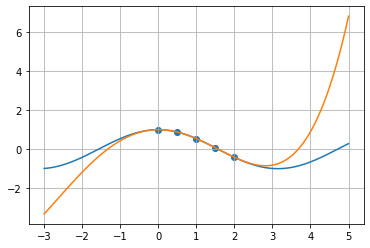

In [33]:
def divided_differences(x_, y_, x):
    n = len(x_)
    k = [[0 for __ in range (n)] for _ in range(n)]
    for i in range(n):
        k[0][i] = y_[i]

    for i in range(1, n):
        for j in range(0, n-i):
            k[i][j] = (k[i-1][j+1] - k[i-1][j]) / (x_[j+i] - x_[j])

    a = [k[i][0] for i in range(n)]

    p = a[0] + a[1] * (x - x_[0]) + a[2] * (x - x_[0])*(x - x_[1])
    p = 0
    for i in range(n):
        c = 1
        for j in range(0, i):
            c *= (x - x_[j])
        p += a[i] * c
    p = sp.simplify(p)
    return p

x_axis = np.linspace(0,2,5)
y_axis = np.cos(x_axis)
x = sp.Symbol('x')

p = divided_differences(x_axis, y_axis, x)


x_polynomial = np.linspace(-3,5,100)
y_polynomial = [p.subs(x, x0) for x0 in x_polynomial]
y_cos = np.cos(x_polynomial)

plt.grid()
plt.scatter(x_axis, y_axis)
plt.plot(x_polynomial, y_cos)
plt.plot(x_polynomial, y_polynomial)

In [27]:
def lagrangian_polynomial(x0, y0, x):
    n = len(x0)

    L = [1 for _ in range(n)]
    for k in range(n):
        for j in range(n):
            if (k != j):
                L[k] *= (x - x0[j])/(x0[k] - x0[j])
    p = 0
    for k in range(n):
        p += L[k] * y0[k]
    p = sp.simplify(p)
    return p

def plot_polynomial(x0, y0, p, x):
    x_axis = np.linspace(min(x0), max(x0), 100)
    y_axis = np.array([p.subs(x, i) for i in x_axis])

    plt.plot(x_axis, y_axis)
    plt.scatter(x0,y0)
    plt.grid()
    title = '$f(x)='+sp.latex(p)+'$'
    plt.title(title)
    plt.show()
    title = '$'+sp.latex(p)+'$'

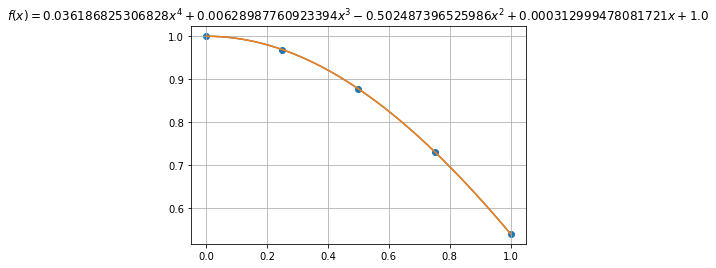

In [28]:
x = sp.Symbol('x')

f = sp.cos(x)
x0 = [0, 0.25, 0.5, 0.75, 1]

n = len(x0)
x0 = np.array(x0)
y0 = np.array([f.subs(x, _) for _ in x0])

x1 = np.linspace(min(x0), max(x0), 100)
y1 = np.array([f.subs(x, _) for _ in x1])

plt.plot(x1, y1)

p = lagrangian_polynomial(x0, y0, x)
plot_polynomial(x0, y0, p, x)